<a href="https://colab.research.google.com/github/fralfaro/desafio_latam/blob/main/docs/solucion.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution

## Pregunta 1

¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [1]:
!pip install loguru

In [2]:
!pip install matplotlib==3.4.2

In [3]:
# libraries
import time
import datetime

from loguru import logger

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [4]:
# start time
start_time = time.time() 

In [5]:
logger.info("Leer Datos")

# leer datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/desafio_latam/main/docs/data/dataset_SCL.csv")
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

df.head()

2022-10-06 18:32:53.088 | INFO     | __main__:<cell line: 1>:1 - Leer Datos


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Vamos a realizar un análisis básicos sobre las columnas:

* **tabla 01**: Información sobre el tipo de datos de las columnas.
* **table 02**: Información estadística básica de las columnas.
* **tabla 03**: Información sobre total de datos, datos nulos y datos únicos.


In [6]:
logger.info("Tabla 01: Tipos de datos")
df.info()

2022-10-06 18:33:07.967 | INFO     | __main__:<cell line: 1>:1 - Tabla 01: Tipos de datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [7]:
logger.info("Tabla02: Estadísticas Descriptiva")
df.describe(include="all")

2022-10-06 18:33:08.095 | INFO     | __main__:<cell line: 1>:1 - Tabla02: Estadísticas Descriptiva


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206.000000,68206.000000,68206.000000,68206,68206,68206,68206,68206
unique,53252,750,1,64,30,62774,866,1,63,32,NaN,NaN,NaN,7,2,23,1,62
top,2017-07-28 13:30:00,174,SCEL,SCFA,LAN,2017-11-05 14:51:00,174,SCEL,SCFA,LAN,NaN,NaN,NaN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,NaN,NaN,NaN,10292,36966,40892,68206,6335
first,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.714790,6.622585,2017.000029,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.782886,3.523321,0.005415,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3.000000,2017.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
def tabla_descriptiva_01(df,col):
    """
    Describe total de valores, nulos, no nulos y valores unicos
    """
        
    total = len(df[col])
    nulos = len(df[df[col].isnull()])
    no_nulos = len(df[df[col].notnull()])
    unicos = len(df[col].unique())

    
    result = pd.DataFrame({
        'columna':[col],
        'total':[total],
        'nulos':[nulos],
        'no_nulos':[no_nulos],
        'unicos':[unicos],
        
    })

    return result

In [9]:
logger.info("Tabla resumen de los datos")
resumen_01 = pd.concat([tabla_descriptiva_01(df,col) for col in df.columns])
resumen_01

2022-10-06 18:33:08.269 | INFO     | __main__:<cell line: 1>:1 - Tabla resumen de los datos


,columna,total,nulos,no_nulos,unicos
0,Fecha-I,68206,0,68206,53252
0,Vlo-I,68206,0,68206,750
0,Ori-I,68206,0,68206,1
0,Des-I,68206,0,68206,64
0,Emp-I,68206,0,68206,30
0,Fecha-O,68206,0,68206,62774
0,Vlo-O,68206,1,68205,867
0,Ori-O,68206,0,68206,1
0,Des-O,68206,0,68206,63
0,Emp-O,68206,0,68206,32


Podemos complementar nuestro entendimiento, analisando de manera univariada algunas de las columnas más importantes:

In [10]:
logger.info("EDA")
logger.info("Analisis Univariado")

2022-10-06 18:33:08.558 | INFO     | __main__:<cell line: 1>:1 - EDA
2022-10-06 18:33:08.560 | INFO     | __main__:<cell line: 2>:2 - Analisis Univariado


2022-10-06 18:33:08.567 | INFO     | __main__:<cell line: 3>:4 - DIA


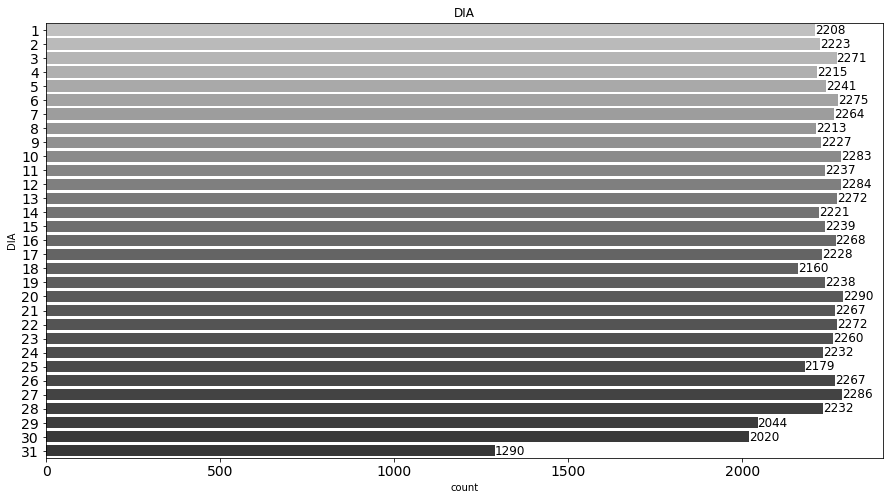

2022-10-06 18:33:09.185 | INFO     | __main__:<cell line: 3>:4 - MES


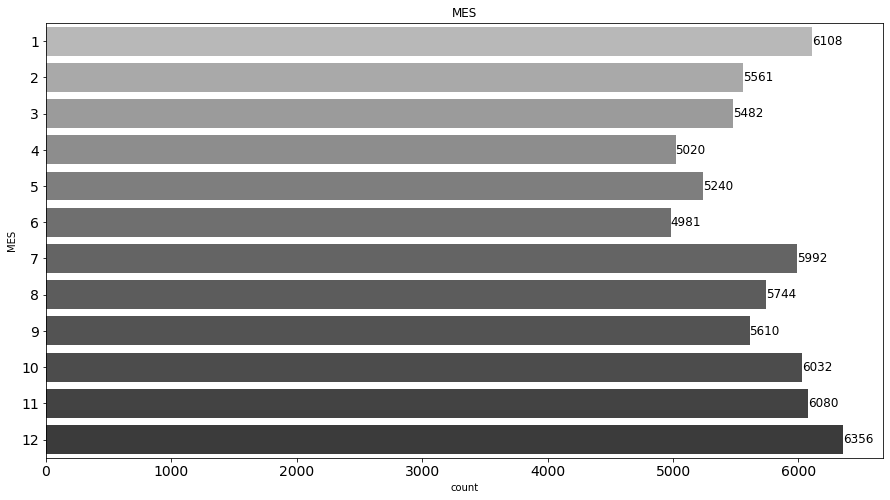

2022-10-06 18:33:09.432 | INFO     | __main__:<cell line: 3>:4 - AÑO


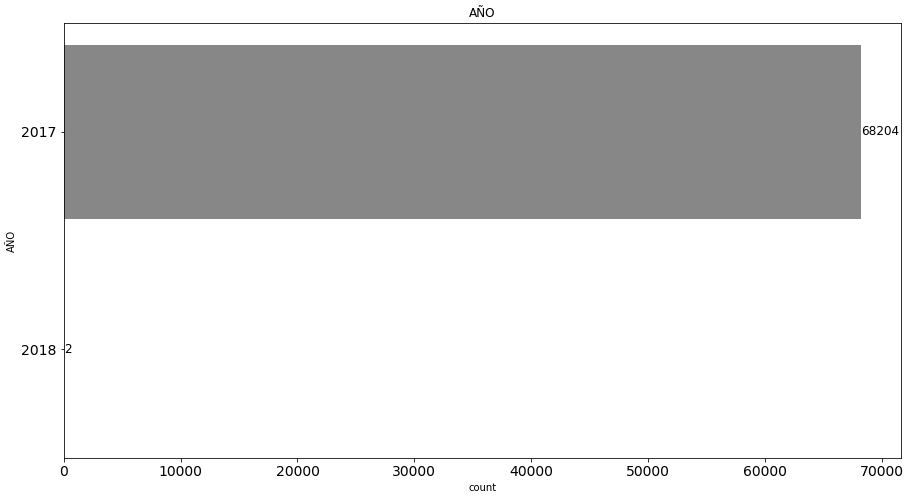

2022-10-06 18:33:09.563 | INFO     | __main__:<cell line: 3>:4 - DIANOM


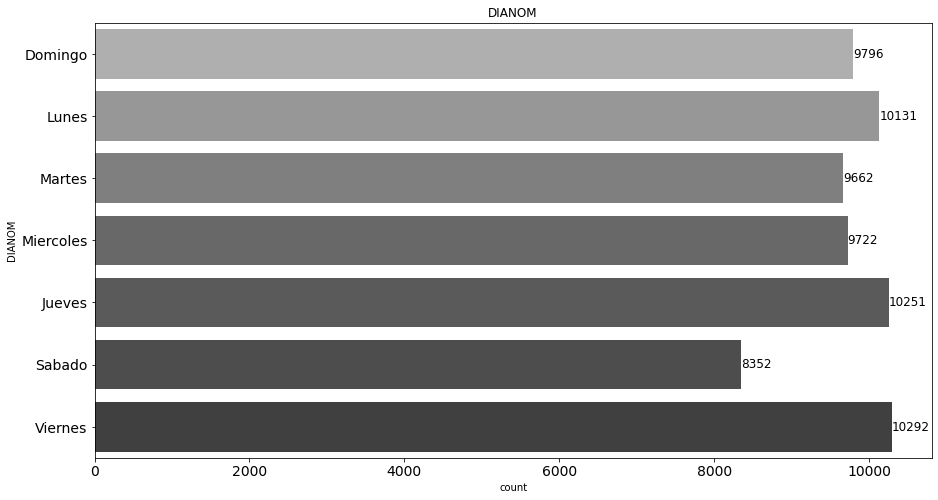

2022-10-06 18:33:09.766 | INFO     | __main__:<cell line: 3>:4 - TIPOVUELO


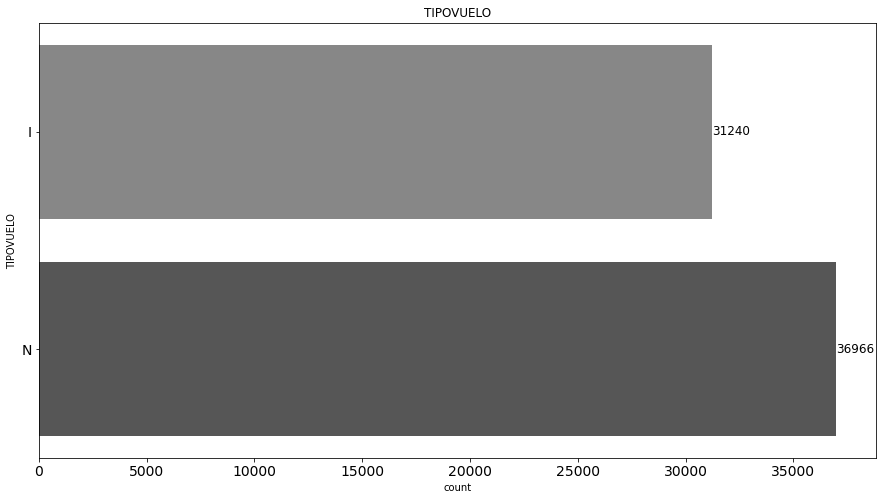

2022-10-06 18:33:09.915 | INFO     | __main__:<cell line: 3>:4 - OPERA


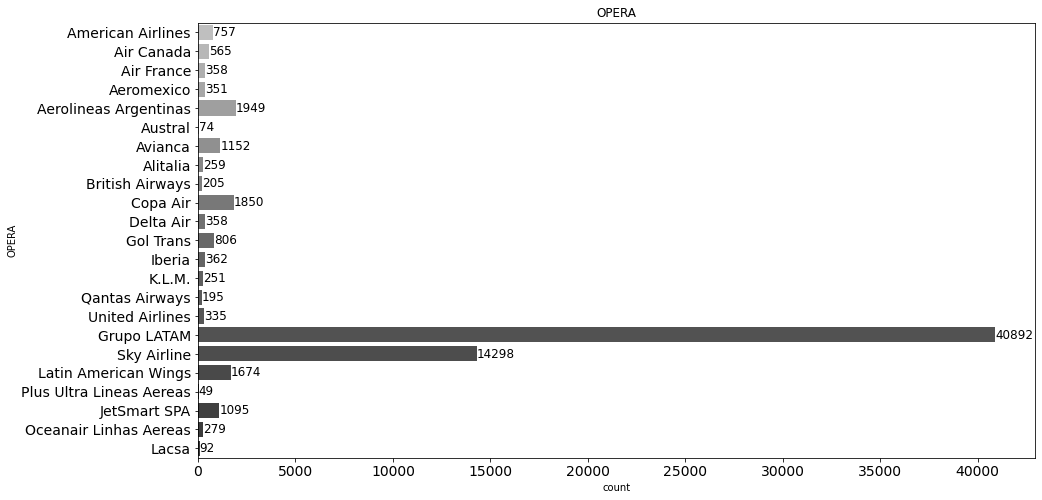

In [11]:
cols = ['DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO','OPERA']

for col in cols:
    logger.info(col)
    plt.figure(figsize = (15,8))
    plotting = sns.countplot(y=col, data=df,   palette='Greys_d')
    for container in plotting.containers:
        plotting.bar_label(container,fontsize=12)
    plt.title(f"{col}")
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.show()

## Pregunta 2
Genera las columnas adicionales y luego expórtelas en un archivo `synthetic_features.csv` :
   * `temporada_alta` : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
   * `dif_min` : diferencia en minutos entre Fecha-O y Fecha-I .
   * `atraso_15` : 1 si dif_min > 15, 0 si no.
   * `periodo_dia` : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


En esta parte realizaremos **Feature Engineering**, es decir, mediante las columnas existentes trataremos de agregar más valor al conjunto de datos.

In [12]:
def agregar_temporada_alta(fecha):
    """
    Definir tipo de temporada:
        - 1 si fecha esta entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep.
        - 0 en otro caso
    """
    
    anno = fecha.year
    
    # fecha está entre 15-Dic y 3-Mar
    restriccion_011 = (fecha>=datetime.date(anno, 12, 15) and fecha<=datetime.date(anno, 12, 31))
    restriccion_012 = (fecha>=datetime.date(anno, 1, 1) and fecha<=datetime.date(anno, 3, 3))
    
    # fecha está entre 15-Jul y 31-Jul
    restriccion_02 = (fecha>=datetime.date(anno, 7, 15) and fecha<=datetime.date(anno, 7, 31))

    
    # fecha está entre 11-Sep y 30-Sep
    restriccion_03 = (fecha>=datetime.date(anno, 9, 11) and fecha<=datetime.date(anno, 9, 30))

    if  restriccion_011 or restriccion_012 or restriccion_02 or restriccion_03:
        return 1
    
    else: 
        return 0

In [13]:
def agregar_dif_min(dias):
    """
    Definir la diferencia en minutos entre Fecha-O y Fecha-I 
    """
    
    return divmod(dias.total_seconds(), 60)[0]

In [14]:
def agregar_atraso_15(minutos):
    """
    Definir atraso:
        - 1 si minutos > 15
        - 0 en otro caso
    """
    
    return 1 if minutos > 15 else 0

In [15]:
def agregar_periodo_dia(hora):
    """
    Definir periodo del dia:
        - manana (entre 5:00 y 11:59)
        - tarde (entre 12:00 y 18:59) 
        -  noche (entre 19:00 y 4:59)
    """
    
    # manana (entre 5:00 y 11:59)
    manana = hora >= datetime.time(5,0) and hora <= datetime.time(11,59)
    
    # tarde (entre 12:00 y 18:59)
    tarde =  hora >= datetime.time(12,0) and hora <= datetime.time(18,59)
        
    # noche (entre 19:00 y 4:59) 
    noche_01 =   hora >= datetime.time(19,0) and hora <= datetime.time(23,59)
    noche_02 =   hora >= datetime.time(0,0) and hora <= datetime.time(4,59)
    
    if manana:
        return "manana"
    
    elif tarde:
        return "tarde"
    
    elif noche_01 or noche_02:
        return "noche"
    
    else:
        return "-"

In [16]:
# aplicar resultados

logger.info("Feature Engineering")
df["temporada_alta"] = df['Fecha-I'] .apply(lambda x: agregar_temporada_alta(x))
df["dif_min"] = (df['Fecha-O']-df['Fecha-I']).apply(lambda x:agregar_dif_min(x) ).astype(int)
df["atraso_15"] = df['dif_min'] .apply(lambda x: agregar_atraso_15(x))
df["periodo_dia"] = df['Fecha-I'].dt.time.apply(lambda x:agregar_periodo_dia(x))

df.head()

2022-10-06 18:33:10.301 | INFO     | __main__:<cell line: 3>:3 - Feature Engineering


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,0,noche


In [17]:
# guardar resultados

logger.info("Exportar resultados 'synthetic_features.csv'")

cols = ['temporada_alta', 'dif_min','atraso_15', 'periodo_dia']
df[cols].to_csv("synthetic_features.csv",sep=',',index=False)

2022-10-06 18:33:11.458 | INFO     | __main__:<cell line: 3>:3 - Exportar resultados 'synthetic_features.csv'


## Pregunta 3

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?


Las variables que más deberían influir (a priori) deberían ser:  **mes del año**, **día de la semana** y **temporada**. Esto lo podemos corroborar analizando los siguientes gráficos y tablas, en donde se tiene el **porcetaje relativo** (total retrasos/ total de casos) de atrasos según categoría. 

Para esta pregunta veremos dos casos:

* **'atraso_15' sobre todas las columnas objetivos**: Se realiza una operación de agrupación de todas las columnas objetivos y se analiza la suma de todos los casos de la columna 'atraso_15'. Ordenamos de menor a mayor los casos de retrasos y mostramos el resultado.

* **'atraso_15' sobre cada una de las columnas objetivos**: Se realiza una operación de agrupación entre 'atraso_15' y cada una de las columnas objetivos. En este caso, obtenemos un porcentaje de atraso relativos, para corroborar para qué casos existen un mayor retraso.

In [18]:
logger.info("'atraso_15' sobre todas las columnas objetivos")
cols = ['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO']
result = df.groupby(cols)['atraso_15'].sum().sort_values().reset_index()
result

2022-10-06 18:33:11.622 | INFO     | __main__:<cell line: 1>:1 - 'atraso_15' sobre todas las columnas objetivos


,Des-O,OPERA,MES,DIANOM,temporada_alta,TIPOVUELO,atraso_15
0,SCIE,Sky Airline,3,Martes,0,N,0
1,SLVR,Grupo LATAM,5,Sabado,0,I,0
2,SACO,Sky Airline,12,Lunes,1,I,0
3,SACO,Sky Airline,12,Sabado,0,I,0
4,SCSE,Grupo LATAM,8,Domingo,0,N,0
...,...,...,...,...,...,...,...
7991,SCFA,Grupo LATAM,10,Viernes,0,N,16
7992,SPJC,Grupo LATAM,1,Lunes,1,I,17
7993,SCFA,Grupo LATAM,10,Jueves,0,N,17
7994,SCFA,Grupo LATAM,10,Lunes,0,N,18


In [19]:
# crear funcion para entender retrasos por columnas objetivos
def porcentaje_retraso(df,col):
    """
    Analizar la variable 'atraso_15' respecto a columnas objetivos
    """
    temp = df.groupby(col)['atraso_15'].agg({np.sum,len}).reset_index()
    temp["porcentaje"] = temp['sum']/temp['len']
    temp.columns = [col,'total','total_retrasos','%_relativo']
    temp = temp[[col,'total_retrasos','total','%_relativo']].sort_values("%_relativo")
    return temp

In [20]:
logger.info("'atraso_15' sobre cada una de las columnas objetivos")
cols = ['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO']
for col in cols:
    logger.info(col)
    temp = porcentaje_retraso(df,col)
    display(temp)

2022-10-06 18:33:11.680 | INFO     | __main__:<cell line: 1>:1 - 'atraso_15' sobre cada una de las columnas objetivos
2022-10-06 18:33:11.681 | INFO     | __main__:<cell line: 3>:4 - Des-O


,Des-O,total_retrasos,total,%_relativo
58,SPSO,0,1,0.000000
30,SBFI,0,2,0.000000
29,SBCT,0,3,0.000000
5,KIAD,0,1,0.000000
6,KIAH,17,334,0.050898
...,...,...,...,...
62,YSSY,113,194,0.582474
26,SAWH,4,6,0.666667
54,SLCB,1,1,1.000000
2,EGYP,1,1,1.000000


2022-10-06 18:33:11.702 | INFO     | __main__:<cell line: 3>:4 - OPERA


,OPERA,total_retrasos,total,%_relativo
1,Aeromexico,10,351,0.028490
22,United Airlines,17,335,0.050746
10,Delta Air,21,358,0.058659
9,Copa Air,116,1850,0.062703
5,American Airlines,51,757,0.067371
15,K.L.M.,21,251,0.083665
3,Air France,30,358,0.083799
13,Iberia,36,362,0.099448
4,Alitalia,29,259,0.111969
16,Lacsa,11,92,0.119565


2022-10-06 18:33:11.721 | INFO     | __main__:<cell line: 3>:4 - MES


,MES,total_retrasos,total,%_relativo
2,3,631,5482,0.115104
3,4,585,5020,0.116534
1,2,843,5561,0.151591
4,5,827,5240,0.157824
0,1,978,6108,0.160118
5,6,852,4981,0.171050
8,9,967,5610,0.172371
7,8,996,5744,0.173398
10,11,1199,6080,0.197204
9,10,1363,6032,0.225962


2022-10-06 18:33:11.735 | INFO     | __main__:<cell line: 3>:4 - DIANOM


,DIANOM,total_retrasos,total,%_relativo
0,Domingo,1578,9796,0.161086
5,Sabado,1363,8352,0.163194
3,Martes,1634,9662,0.169116
4,Miercoles,1661,9722,0.170850
1,Jueves,2045,10251,0.199493
2,Lunes,2048,10131,0.202152
6,Viernes,2285,10292,0.222017


2022-10-06 18:33:11.753 | INFO     | __main__:<cell line: 3>:4 - temporada_alta


,temporada_alta,total_retrasos,total,%_relativo
0,0,8144,45444,0.17921
1,1,4470,22762,0.19638


2022-10-06 18:33:11.766 | INFO     | __main__:<cell line: 3>:4 - TIPOVUELO


,TIPOVUELO,total_retrasos,total,%_relativo
1,N,5566,36966,0.150571
0,I,7048,31240,0.225608


In [21]:
def plot_categorical(df,col1,col2):
    title = f"{col1} & {col2}"
    logger.info(title)
    df_temp = df.groupby([col1,col2]).size().reset_index(name = "Count")
    plt.figure(figsize = (10,5))
    sns.barplot(x = col1,y="Count", hue = col2,data = df_temp,palette='Greys_d')
    plt.title(title)
    plt.show()

2022-10-06 18:33:11.799 | INFO     | __main__:<cell line: 2>:3 - MES
2022-10-06 18:33:11.801 | INFO     | __main__:plot_categorical:3 - MES & atraso_15


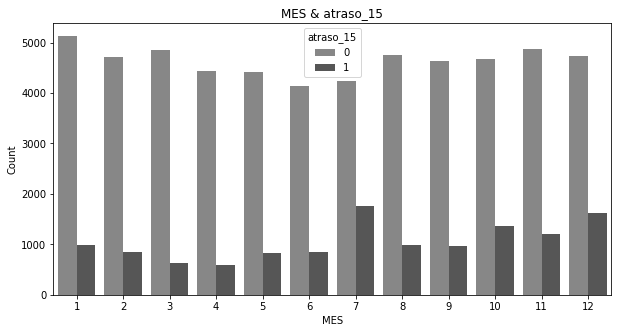

2022-10-06 18:33:12.158 | INFO     | __main__:<cell line: 2>:3 - DIANOM
2022-10-06 18:33:12.159 | INFO     | __main__:plot_categorical:3 - DIANOM & atraso_15


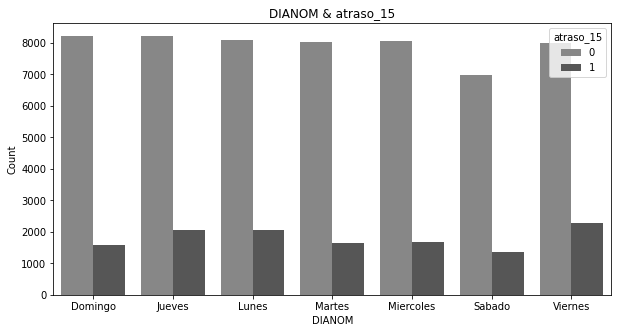

2022-10-06 18:33:12.392 | INFO     | __main__:<cell line: 2>:3 - temporada_alta
2022-10-06 18:33:12.392 | INFO     | __main__:plot_categorical:3 - temporada_alta & atraso_15


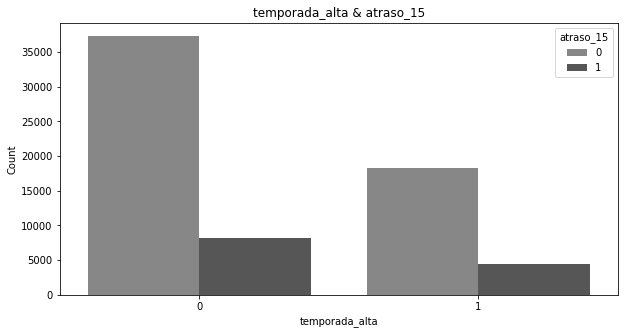

2022-10-06 18:33:12.620 | INFO     | __main__:<cell line: 2>:3 - TIPOVUELO
2022-10-06 18:33:12.621 | INFO     | __main__:plot_categorical:3 - TIPOVUELO & atraso_15


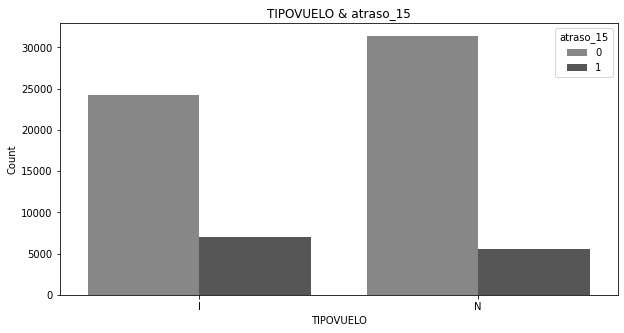

In [22]:
cols = [ 'MES','DIANOM','temporada_alta','TIPOVUELO']
for col in cols:
    logger.info(col)
    plot_categorical(df,col,"atraso_15")

## Pregunta 4-5

* Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.


* Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?.


Tomando en cuenta el **Feature Engineering** y los gráficos anteriores, podemos decir que las columnas que más influyen son: 
   * `['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO']`
   
   
Para este caso, aplicamos 3 modelos:
   * **LightGBM - LGBM**
   * **Random Forest -RF**
   * **KNeighbors - KNN**

Además, evaluaremos las siguientes métricas:
   * **accuracy**
   * **recall**
   * **precision**
   * **fscore**
   
> **Nota**: Se pueden trabajar más columnas del conjunto de datos y/o más modelos, esto dependerá del entendimiento del problema y el poder de cómputo para poder ejecutar los modelos en paralelo.

In [23]:
def label_encoder(df,col):
    """
    Agregar label_encoder a columnas objetivos
    """
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [24]:
logger.info("Label Encoding")
label_list = ['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO']

for col in label_list:
    label_encoder(df,col)

2022-10-06 18:33:12.769 | INFO     | __main__:<cell line: 1>:1 - Label Encoding


In [25]:
# Apply Different Models

def summary_metrics(df) -> pd.DataFrame:
    """
    Metricas de Clasificacion
    """
    
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

def apply_model(
        df,
        model,
        name_model,
        cols_features = ['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO'],
        target = 'atraso_15'
):
    """
    Aplicar modelos de clasificacion al conjunto de datos objetivos
    """
    
    logger.info(name_model)
    logger.info("Train Test Split")

    x = df[cols_features] 
    y = df['atraso_15']


    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

    y_train = y_train.values.reshape(-1,1)
    y_test = y_test.values.reshape(-1,1)
    
    y_train_numeric = [x[0] for x in y_train]
    y_test_numeric = [x[0] for x in y_test]


    logger.info("Modelo")
    
    model_fit = model.fit(x_train, y_train)
    preds = model_fit.predict(x_test)
    
    logger.info("Obtener metricas")
    
    df_temp = pd.DataFrame({'y':y_test_numeric,'yhat':preds})
    df_metrics = summary_metrics(df_temp)
    df_metrics['model'] = name_model
    
    
    return df_metrics

In [26]:
logger.info("Aplicar diferentes modelos")

# name models
dct_models = {
    "LGBM - default": lgb.LGBMClassifier(),
    "Random Forest - default":  RandomForestClassifier(random_state = 42),
    "KNN - GridSearch":GridSearchCV(
        KNeighborsClassifier(algorithm = "auto"),
        {
            'n_neighbors':np.arange(1,12),
             'p':np.arange(1,3),
             'weights':['uniform','distance']
        },
        cv=5
    )

}

frames_models = [apply_model(df,model,name_model) for name_model,model in dct_models.items()]
result = pd.concat(frames_models).sort_values("accuracy",ascending=False)
result

2022-10-06 18:33:12.917 | INFO     | __main__:<cell line: 1>:1 - Aplicar diferentes modelos
2022-10-06 18:33:12.920 | INFO     | __main__:apply_model:32 - LGBM - default
2022-10-06 18:33:12.922 | INFO     | __main__:apply_model:33 - Train Test Split
2022-10-06 18:33:12.970 | INFO     | __main__:apply_model:48 - Modelo
2022-10-06 18:33:14.368 | INFO     | __main__:apply_model:53 - Obtener metricas
2022-10-06 18:33:14.398 | INFO     | __main__:apply_model:32 - Random Forest - default
2022-10-06 18:33:14.399 | INFO     | __main__:apply_model:33 - Train Test Split
2022-10-06 18:33:14.438 | INFO     | __main__:apply_model:48 - Modelo
2022-10-06 18:33:17.430 | INFO     | __main__:apply_model:53 - Obtener metricas
2022-10-06 18:33:17.454 | INFO     | __main__:apply_model:32 - KNN - GridSearch
2022-10-06 18:33:17.455 | INFO     | __main__:apply_model:33 - Train Test Split
2022-10-06 18:33:17.484 | INFO     | __main__:apply_model:48 - Modelo
2022-10-06 18:34:20.417 | INFO     | __main__:apply_m

,accuracy,recall,precision,fscore,model
0,0.8173,0.5277,0.7454,0.5063,LGBM - default
0,0.8132,0.5305,0.6774,0.5146,KNN - GridSearch
0,0.7973,0.5444,0.6101,0.5443,Random Forest - default


> Según la métrica de **f-score**, **Random Forest** es el mejor modelo para este caso. La misma situación ocurre si compara **recall**. Sin embargo, si comparamos la métrica **accuracy** o **precision**, el mejor modelo es **LGBM**. Para este caso, nos quedaremos con el modelo de **Random Forest**.

A continuación, realizaremos el análisis completo del mejor modelo y el cálculo de probabilidades realcionado al retraso de un vuelo.

In [27]:
logger.info("Train Test Split")

cols = ['Des-O','OPERA', 'MES','DIANOM','temporada_alta','TIPOVUELO']
target = 'atraso_15'

x = df[label_list] 
y = df['atraso_15']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

y_train_numeric = [x[0] for x in y_train]
y_test_numeric = [x[0] for x in y_test]

print(f"x_train shape:  {x_train.shape}")
print(f"x_test shape:   {x_test.shape}")
print(f"y_train shape:  {y_train.shape}")
print(f"y_test shape:   {y_test.shape}" )

2022-10-06 18:34:20.448 | INFO     | __main__:<cell line: 1>:1 - Train Test Split


x_train shape:  (54564, 6)
x_test shape:   (13642, 6)
y_train shape:  (54564, 1)
y_test shape:   (13642, 1)


In [28]:
logger.info("Mejor Modelo")

name_model = "Random Forest - default"    
model = RandomForestClassifier(random_state = 42)
model_fit = model.fit(x_train, y_train)
preds_train = model_fit.predict(x_train)
preds_test = model_fit.predict(x_test)

2022-10-06 18:34:20.488 | INFO     | __main__:<cell line: 1>:1 - Mejor Modelo


In [29]:
logger.info('Confusion matrix (Train):\n ')
print(confusion_matrix(preds_train,y_train))

2022-10-06 18:34:23.616 | INFO     | __main__:<cell line: 1>:1 - Confusion matrix (Train):
 


[[43434  7776]
 [ 1090  2264]]


In [30]:
logger.info('Metrics (Train): ')
df_metrics_train = summary_metrics(pd.DataFrame({'y':y_train_numeric,'yhat':preds_train}))
df_metrics_train

2022-10-06 18:34:23.631 | INFO     | __main__:<cell line: 1>:1 - Metrics (Train): 


,accuracy,recall,precision,fscore
0,0.8375,0.6005,0.7616,0.6227


In [31]:
logger.info('Confusion matrix (Test):\n ')
print(confusion_matrix(preds_test,y_test))

2022-10-06 18:34:23.710 | INFO     | __main__:<cell line: 1>:1 - Confusion matrix (Test):
 


[[10521  2218]
 [  547   356]]


In [32]:
logger.info('Metrics (Test): ')
df_metrics_train = summary_metrics(pd.DataFrame({'y':y_test_numeric,'yhat':preds_test}))
df_metrics_train

2022-10-06 18:34:23.720 | INFO     | __main__:<cell line: 1>:1 - Metrics (Test): 


,accuracy,recall,precision,fscore
0,0.7973,0.5444,0.6101,0.5443


2022-10-06 18:34:23.750 | INFO     | __main__:<cell line: 3>:3 - importancia de las variables


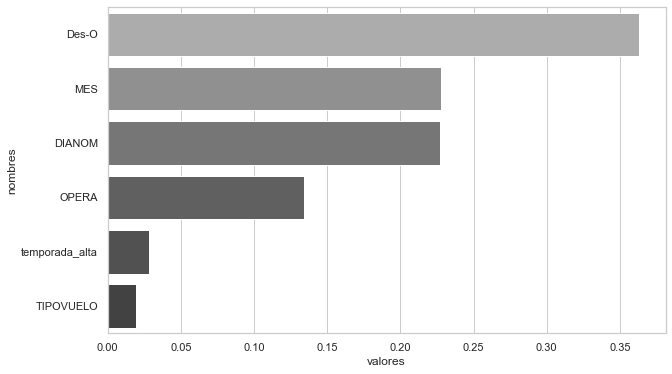

In [33]:
# importancia de las variables

logger.info("importancia de las variables")

df_importancia = pd.DataFrame({
    'nombres' : x.columns,
    'valores' : model.feature_importances_
}).sort_values("valores",ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_importancia, x="valores", y="nombres",palette='Greys_d')
plt.show()

In [34]:
# probabilidades 

logger.info("Probabilidad de que un vuelo se retrase")
y_pred_proba = list(model_fit.predict_proba(x)[:,1])
df['probabilidad_retraso'] = y_pred_proba
df.head()

2022-10-06 18:34:23.966 | INFO     | __main__:<cell line: 3>:3 - Probabilidad de que un vuelo se retrase


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,probabilidad_retraso
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,10,AAL,...,0,0,5,Santiago,Miami,1,3,0,noche,0.000000
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,10,AAL,...,2,0,5,Santiago,Miami,1,9,0,noche,0.111287
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,10,AAL,...,3,0,5,Santiago,Miami,1,9,0,noche,0.148561
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,10,AAL,...,4,0,5,Santiago,Miami,1,3,0,noche,0.000000
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,10,AAL,...,1,0,5,Santiago,Miami,1,-2,0,noche,0.201677


In [35]:
# time

final_time = time.time() - start_time
print(f"--- total time: {round(final_time,2)} seconds ---" )

--- total time: 91.47 seconds ---
